<a href="https://colab.research.google.com/github/Lijiacheng2001/note-warehouse/blob/master/midlevel_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 205.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
goog

In [2]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [3]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [4]:
path = untar_data(URLs.IMDB)
dls = DataBlock(
    blocks=(TextBlock.from_folder(path),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path)

In [5]:
files = get_text_files(path, folders = ['train', 'test'])
txts = L(o.open().read() for o in files[:2000])

In [6]:
tok = Tokenizer.from_folder(path)
tok.setup(txts)
toks = txts.map(tok)
toks[0]

(#257) ['xxbos','what','a','great','little','film',',','lots','of','good'...]

In [7]:
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10]

TensorText([  2,  62,  13,  71, 135,  30,  10, 615,  14,  65])

In [8]:
nums_dec = num.decode(nums[0][:10]); nums_dec

(#10) ['xxbos','what','a','great','little','film',',','lots','of','good']

In [9]:
tok.decode(nums_dec)

'xxbos what a great little film , lots of good'

In [10]:
tok((txts[0], txts[1]))

((#257) ['xxbos','what','a','great','little','film',',','lots','of','good'...],
 (#887) ['xxbos','17','/','02','/','09','"','more','"','('...])

In [11]:
def f(x:int): return x+1
tfm = Transform(f)
tfm(2),tfm(2.0)

(3, 2.0)

In [12]:
@Transform
def f(x:int): return x+1
f(2),f(2.0)

(3, 2.0)

In [13]:
class NormalizeMean(Transform):
    def setups(self, items): self.mean = sum(items)/len(items)
    def encodes(self, x): return x-self.mean
    def decodes(self, x): return x+self.mean

In [14]:
tfm = NormalizeMean()
tfm.setup([1,2,3,4,5])
start = 2
y = tfm(start)
z = tfm.decode(y)
tfm.mean,y,z

(3.0, -1.0, 2.0)

In [15]:
tfms = Pipeline([tok, num])
t = tfms(txts[0]); t[:20]

TensorText([   2,   62,   13,   71,  135,   30,   10,  615,   14,   65,  526,   51,   68, 2295,  465,   11,    8,  990,   59,   39])

In [16]:
tfms.decode(t)[:100]

'xxbos what a great little film , lots of good roles from some random stars . xxmaj basically there a'

In [17]:
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize])

In [18]:
t = tls[0]; t[:20]

TensorText([   2,   65,   13,  103,  139,   32,   11,  748,   14,   68,  590,   51,   66, 1474,  428,   10,    8,  680,   55,   39])

In [19]:
tls.decode(t)[:100]

'xxbos what a great little film , lots of good roles from some random stars . xxmaj basically there a'

In [20]:
tls.show(t)

xxbos what a great little film , lots of good roles from some random stars . xxmaj basically there are these pot growers that get caught up in a comical adventure . xxmaj at points the film makes you believe everyone is going to end up dead ! xxmaj which adds to the comedy . xxmaj when the character of xxmaj john xxmaj lithgow ( 3rd xxmaj rock ) re - appears - its impossible not to imagine the trip , this may have caused , like a total paradox . xxmaj the film is full of twists and turns that keep you guessing all the way to the end . xxmaj billy xxmaj bob xxmaj thornton xxmaj astronaut xxmaj farmer ) is brilliant , in fact looking back , the character is fairly similar in the fact he holds the family of pot growers together . xxmaj everyone involved in this film should get a big thumbs up . 

 xxmaj as i say ' the final scene is a dream ; however a nightmare at the same time . i love it when xxmaj hank xxmaj azaria ( carter ) says at the end do you think we should do this every year ?

In [21]:
cut = int(len(files)*0.8)
splits = [list(range(cut)), list(range(cut,len(files)))]
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize],
                splits=splits)

In [22]:
tls.valid[0][:20]

TensorText([   2,    8,   51,    9,  107,  584,   11,   20,   22,  171,   22,   16,   57,   49,  399,  727,   14,  579,  366, 2026])

In [23]:
lbls = files.map(parent_label)
lbls

(#50000) ['pos','pos','pos','pos','pos','pos','pos','pos','pos','pos'...]

In [24]:
cat = Categorize()
cat.setup(lbls)
cat.vocab, cat(lbls[0])

(['neg', 'pos'], TensorCategory(1))

In [25]:
tls_y = TfmdLists(files, [parent_label, Categorize()])
tls_y[0]

TensorCategory(1)

In [26]:
x_tfms = [Tokenizer.from_folder(path), Numericalize]
y_tfms = [parent_label, Categorize()]
dsets = Datasets(files, [x_tfms, y_tfms])
x,y = dsets[0]
x[:20],y

(TensorText([   2,   65,   13,  103,  139,   32,   11,  748,   14,   68,  590,   51,   66, 1474,  428,   10,    8,  680,   55,   39]),
 TensorCategory(1))

In [27]:
x_tfms = [Tokenizer.from_folder(path), Numericalize]
y_tfms = [parent_label, Categorize()]
dsets = Datasets(files, [x_tfms, y_tfms], splits=splits)
x,y = dsets.valid[0]
x[:20],y

(TensorText([   2,    8,   51,    9,  107,  584,   11,   20,   22,  171,   22,   16,   57,   49,  399,  727,   14,  579,  366, 2026]),
 TensorCategory(0))

In [28]:
t = dsets.valid[0]
dsets.decode(t)

('xxbos xxmaj from the first moment , this " thing " is just an awful sequence of extremely short cuts of blurry camera work . xxmaj while the overall plot has every potential for a thriller , the story is so badly told that xxmaj i \'m unable to buy it . xxmaj from the middle of the film , the actions of characters do n\'t make sense to me . xxmaj stop reading now to avoid xxup spoilers . \n\n xxmaj for instance , xxmaj ed \'s idea to have xxmaj edna make coffee for them after having shot off her son \'s arm is way below his alleged experience ; it \'s just an extremely stupid idea . xxmaj domino not questioning the fragmentary orders she receives from xxmaj xxunk xxmaj williams over a breaking - up phone connection just eludes me ; should n\'t she be long suspicious that xxmaj williams is turning them in ? xxmaj those xxup fbi agents seem out of their minds showing up with just one single helicopter to something they have every reason to consider a capital mafia shoot - out . xxmaj b

In [29]:
dls = dsets.dataloaders(bs=64, before_batch=pad_input)

In [30]:
tfms = [[Tokenizer.from_folder(path), Numericalize], [parent_label, Categorize]]
files = get_text_files(path, folders = ['train', 'test'])
splits = GrandparentSplitter(valid_name='test')(files)
dsets = Datasets(files, tfms, splits=splits)
dls = dsets.dataloaders(dl_type=SortedDL, before_batch=pad_input)

In [31]:
path = untar_data(URLs.IMDB)
dls = DataBlock(
    blocks=(TextBlock.from_folder(path),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path)

In [32]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

In [33]:
class SiameseImage(fastuple):
    def show(self, ctx=None, **kwargs):
        img1,img2,same_breed = self
        if not isinstance(img1, Tensor):
            if img2.size != img1.size: img2 = img2.resize(img1.size)
            t1,t2 = tensor(img1),tensor(img2)
            t1,t2 = t1.permute(2,0,1),t2.permute(2,0,1)
        else: t1,t2 = img1,img2
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1,line,t2], dim=2),
                          title=same_breed, ctx=ctx)

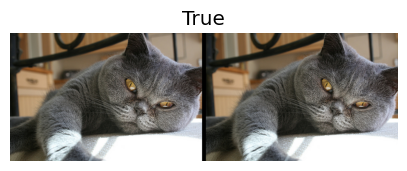

In [34]:
img = PILImage.create(files[0])
s = SiameseImage(img, img, True)
s.show();

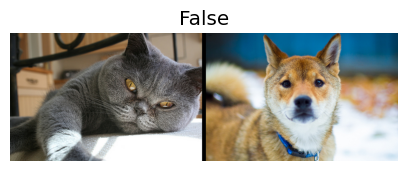

In [35]:
img1 = PILImage.create(files[1])
s1 = SiameseImage(img, img1, False)
s1.show();

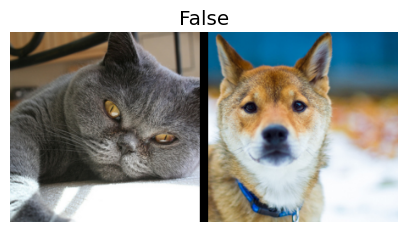

In [36]:
s2 = Resize(224)(s1)
s2.show();

In [37]:
def label_func(fname):
    return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]

In [38]:
class SiameseTransform(Transform):
    def __init__(self, files, label_func, splits):
        self.labels = files.map(label_func).unique()
        self.lbl2files = {l: L(f for f in files if label_func(f) == l)
                          for l in self.labels}
        self.label_func = label_func
        self.valid = {f: self._draw(f) for f in files[splits[1]]}

    def encodes(self, f):
        f2,t = self.valid.get(f, self._draw(f))
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, t)

    def _draw(self, f):
        same = random.random() < 0.5
        cls = self.label_func(f)
        if not same:
            cls = random.choice(L(l for l in self.labels if l != cls))
        return random.choice(self.lbl2files[cls]),same

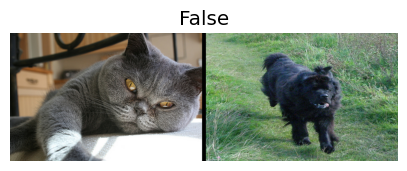

In [39]:
splits = RandomSplitter()(files)
tfm = SiameseTransform(files, label_func, splits)
tfm(files[0]).show();

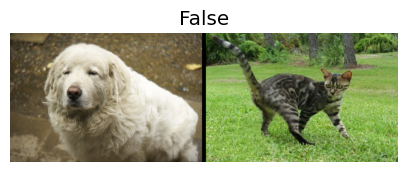

In [40]:
tls = TfmdLists(files, tfm, splits=splits)
show_at(tls.valid, 0);

In [41]:
dls = tls.dataloaders(after_item=[Resize(224), ToTensor],
    after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])